# Topics in Economics - Project 2 

## Section 4

#### We will use the Fama-French three-factor model, which are Market, SMB, and HML, to predict stock returns and find the impact of MEVs on Fama-French factors using linear regressions. By combining these two, we can predict the performance of a portfolio. We will compare the performance of your portfolio under supervisory baseline vs severely adverse scenarios. When reporting the results of each set of regressions, provide the point estimate, either standard deviation or t-stats, goodness-of-fit, and residual analysis if it is abnormal


In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

mev = pd.read_csv("/Users/yasmineouattara/Desktop/TIE-Project 2/2024-Table_2A_Historic_Domestic.csv")
mev.head(30)

,Scenario Name,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,1976 Q1,9.3,14.0,5.0,9.6,7.7,4.7,4.9,7.4,7.6,NaN,8.9,6.8,NaN,22.9,50.9,NaN
1,Actual,1976 Q2,3.0,7.2,2.3,5.8,7.6,3.6,5.2,7.4,7.6,NaN,8.8,6.9,NaN,23.6,51.8,NaN
2,Actual,1976 Q3,2.2,7.6,3.2,9.6,7.7,6.5,5.2,7.3,7.6,NaN,9.0,7.1,NaN,24.2,52.6,NaN
3,Actual,1976 Q4,2.9,10.5,2.6,9.2,7.8,5.9,4.7,6.5,7.1,NaN,8.8,6.5,NaN,25.2,53.4,NaN
4,Actual,1977 Q1,4.8,11.7,0.9,8.4,7.5,7.5,4.6,6.8,7.2,NaN,8.7,6.3,NaN,26.2,55.0,NaN
5,Actual,1977 Q2,8.0,14.2,3.8,11.1,7.1,7.2,4.8,6.8,7.3,NaN,8.8,6.5,NaN,27.5,56.0,NaN
6,Actual,1977 Q3,7.4,12.7,5.7,12.2,6.9,5.6,5.5,7.0,7.3,NaN,8.9,6.9,NaN,28.4,57.3,NaN
7,Actual,1977 Q4,0.0,8.9,7.9,14.1,6.7,6.0,6.1,7.4,7.6,NaN,8.9,7.7,NaN,29.2,58.5,NaN
8,Actual,1978 Q1,1.3,7.3,3.2,10.1,6.3,7.1,6.4,7.8,8.0,NaN,9.1,8.0,NaN,30.5,59.7,NaN
9,Actual,1978 Q2,16.4,25.5,4.3,13.1,6.0,9.4,6.5,8.2,8.2,NaN,9.6,8.3,NaN,31.5,61.4,NaN


In [26]:
# Macro Economic Variable Baseline Scenario
mev_BaselineScenario = pd.read_csv("/Users/yasmineouattara/Desktop/TIE-Project 2/2024-Table_3A_Supervisory_Baseline_Domestic.csv") 
mev_BaselineScenario

,Scenario Name,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Supervisory Baseline,2024 Q1,1.0,3.2,2.5,4.6,3.9,2.4,5.3,4.2,4.1,5.8,6.5,8.4,47787.5,311.6,350.2,24.6
1,Supervisory Baseline,2024 Q2,0.7,2.9,1.8,4.0,4.1,2.3,5.0,4.0,4.0,5.7,6.1,8.1,47787.5,312.8,351.5,26.0
2,Supervisory Baseline,2024 Q3,0.9,3.1,1.8,4.0,4.2,2.4,4.6,3.9,3.9,5.7,5.8,7.7,47787.5,313.9,352.8,26.8
3,Supervisory Baseline,2024 Q4,1.5,3.6,2.0,4.1,4.3,2.3,4.2,3.8,3.8,5.6,5.6,7.3,47787.5,315.1,354.2,27.2
4,Supervisory Baseline,2025 Q1,1.8,4.1,2.4,4.5,4.3,2.2,3.9,3.6,3.7,5.5,5.4,7.0,47787.5,316.3,355.5,27.5
5,Supervisory Baseline,2025 Q2,2.0,4.2,2.3,4.3,4.2,2.2,3.6,3.6,3.7,5.5,5.3,6.7,47787.5,317.5,356.8,27.7
6,Supervisory Baseline,2025 Q3,2.1,4.3,2.2,4.3,4.2,2.3,3.4,3.5,3.6,5.5,5.3,6.4,47787.5,318.6,358.1,27.9
7,Supervisory Baseline,2025 Q4,2.1,4.3,2.2,4.2,4.1,2.3,3.2,3.4,3.6,5.5,5.2,6.3,47787.5,319.8,359.5,28.0
8,Supervisory Baseline,2026 Q1,2.1,4.3,2.2,4.3,4.1,2.2,3.2,3.3,3.6,5.5,5.2,6.2,47787.5,321.0,360.8,28.1
9,Supervisory Baseline,2026 Q2,2.0,3.9,2.0,4.2,4.1,2.2,3.2,3.3,3.6,5.5,5.2,6.2,47787.5,322.2,362.2,28.2


In [27]:
# Macro Economic Variable Baseline Forecast

mev_StressedScenario = pd.read_csv("/Users/yasmineouattara/Desktop/TIE-Project 2/2024-Table_4A_Supervisory_Severely_Adverse_Domestic.csv")
mev_BaselineScenario

,Scenario Name,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Supervisory Baseline,2024 Q1,1.0,3.2,2.5,4.6,3.9,2.4,5.3,4.2,4.1,5.8,6.5,8.4,47787.5,311.6,350.2,24.6
1,Supervisory Baseline,2024 Q2,0.7,2.9,1.8,4.0,4.1,2.3,5.0,4.0,4.0,5.7,6.1,8.1,47787.5,312.8,351.5,26.0
2,Supervisory Baseline,2024 Q3,0.9,3.1,1.8,4.0,4.2,2.4,4.6,3.9,3.9,5.7,5.8,7.7,47787.5,313.9,352.8,26.8
3,Supervisory Baseline,2024 Q4,1.5,3.6,2.0,4.1,4.3,2.3,4.2,3.8,3.8,5.6,5.6,7.3,47787.5,315.1,354.2,27.2
4,Supervisory Baseline,2025 Q1,1.8,4.1,2.4,4.5,4.3,2.2,3.9,3.6,3.7,5.5,5.4,7.0,47787.5,316.3,355.5,27.5
5,Supervisory Baseline,2025 Q2,2.0,4.2,2.3,4.3,4.2,2.2,3.6,3.6,3.7,5.5,5.3,6.7,47787.5,317.5,356.8,27.7
6,Supervisory Baseline,2025 Q3,2.1,4.3,2.2,4.3,4.2,2.3,3.4,3.5,3.6,5.5,5.3,6.4,47787.5,318.6,358.1,27.9
7,Supervisory Baseline,2025 Q4,2.1,4.3,2.2,4.2,4.1,2.3,3.2,3.4,3.6,5.5,5.2,6.3,47787.5,319.8,359.5,28.0
8,Supervisory Baseline,2026 Q1,2.1,4.3,2.2,4.3,4.1,2.2,3.2,3.3,3.6,5.5,5.2,6.2,47787.5,321.0,360.8,28.1
9,Supervisory Baseline,2026 Q2,2.0,3.9,2.0,4.2,4.1,2.2,3.2,3.3,3.6,5.5,5.2,6.2,47787.5,322.2,362.2,28.2


In [28]:
wrds_data = pd.read_excel("/Users/yasmineouattara/Desktop/TIE-Project 2/wrds_data.xlsx")
print(wrds_data.columns)
wrds_data

Index(['Date', 'ARCHER-DANIELS-MIDLAND CO', 'BANK OF AMERICA CORP',
       'BIOGEN INC', 'CITIGROUP INC', 'CONAGRA BRANDS INC',
       'COLGATE-PALMOLIVE CO', 'CAMPBELL SOUP CO', 'GOLDMAN SACHS GROUP INC',
       'JOHNSON & JOHNSON', 'JPMORGAN CHASE & CO', 'KELLANOVA',
       'KRAFT HEINZ CO', 'COCA-COLA CO', 'LILLY (ELI) & CO', 'MERCK & CO',
       'MORGAN STANLEY', 'PFIZER INC', 'PROCTER & GAMBLE CO',
       'TYSON FOODS INC  -CL A', 'WALMART INC', 'MKT COMPOSITE RETURN',
       'S&P RETURN', 'FAMA-FRENCH MARKET FACTOR', 'RISK-FREE RATE',
       'FAMA-FRENCH SIZE FACTOR (SMB)', 'FAMA-FRENCH VALUE FACTOR (HML)',
       'MOMENTUM FACTOR', 'Unnamed: 28',
       'https://wrds-www.wharton.upenn.edu/classroom/stock-and-factor-returns/',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')


/Users/yasmineouattara/anaconda3/envs/plab2024/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Date,ARCHER-DANIELS-MIDLAND CO,BANK OF AMERICA CORP,BIOGEN INC,CITIGROUP INC,CONAGRA BRANDS INC,COLGATE-PALMOLIVE CO,CAMPBELL SOUP CO,GOLDMAN SACHS GROUP INC,JOHNSON & JOHNSON,...,RISK-FREE RATE,FAMA-FRENCH SIZE FACTOR (SMB),FAMA-FRENCH VALUE FACTOR (HML),MOMENTUM FACTOR,Unnamed: 28,https://wrds-www.wharton.upenn.edu/classroom/stock-and-factor-returns/,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,1963-01,NaN,0.0608,NaN,NaN,NaN,0.0724,0.0935,NaN,0.1024,...,0.0025,0.0308,0.0221,-0.0211,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-02,NaN,0.0145,NaN,NaN,NaN,0.0000,-0.1033,NaN,0.0196,...,0.0023,0.0048,0.0218,0.0253,NaN,NaN,Ticker,Ticker list for https://wrds-www.wharton.upenn...,Name,ticker list for https://wrds-www.wharton.upenn...
2,1963-03,NaN,0.0139,NaN,NaN,NaN,0.0722,0.0119,NaN,0.0033,...,0.0023,-0.0259,0.0206,0.0162,NaN,NaN,BIIB,BIIB,BIOGEN INC,BIIB
3,1963-04,NaN,0.1339,NaN,NaN,NaN,0.0459,0.0031,NaN,0.0120,...,0.0025,-0.0134,0.0100,-0.0009,NaN,NaN,JNJ,"BIIB, JNJ",JOHNSON & JOHNSON,BIIB JNJ
4,1963-05,NaN,0.0686,NaN,NaN,NaN,0.0102,0.0210,NaN,0.0509,...,0.0024,0.0113,0.0254,0.0033,NaN,NaN,LLY,"BIIB, JNJ, LLY",ELI LILLY & CO,BIIB JNJ LLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2023-08,-0.0613,-0.0966,-0.0105,-0.1225,-0.0893,-0.0366,-0.0899,-0.0714,-0.0278,...,0.0045,-0.0320,-0.0108,0.0377,NaN,NaN,NaN,NaN,NaN,NaN
728,2023-09,-0.0489,-0.0450,-0.0387,-0.0039,-0.0823,-0.0321,-0.0149,-0.0126,-0.0367,...,0.0043,-0.0249,0.0145,0.0024,NaN,NaN,NaN,NaN,NaN,NaN
729,2023-10,-0.0510,-0.0380,-0.0758,-0.0399,-0.0022,0.0631,-0.0073,-0.0617,-0.0476,...,0.0047,-0.0388,0.0019,0.0168,NaN,NaN,NaN,NaN,NaN,NaN
730,2023-11,0.0365,0.1667,-0.0146,0.1808,0.0468,0.0486,-0.0057,0.1340,0.0506,...,0.0044,-0.0003,0.0166,0.0276,NaN,NaN,NaN,NaN,NaN,NaN


#### 1 - Read the details about MEVs. Pick a subset of MEVs to represent a severely adverse scenarios under which you will stress test your portfolio. Provide economic justification for your choice.

/var/folders/f6/v8xrmxds5l59tw_j8gystq_h0000gn/T/ipykernel_31210/4102836027.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mev['Date'] = pd.to_datetime(mev['Date'].str.replace(' Q', '-Q'))


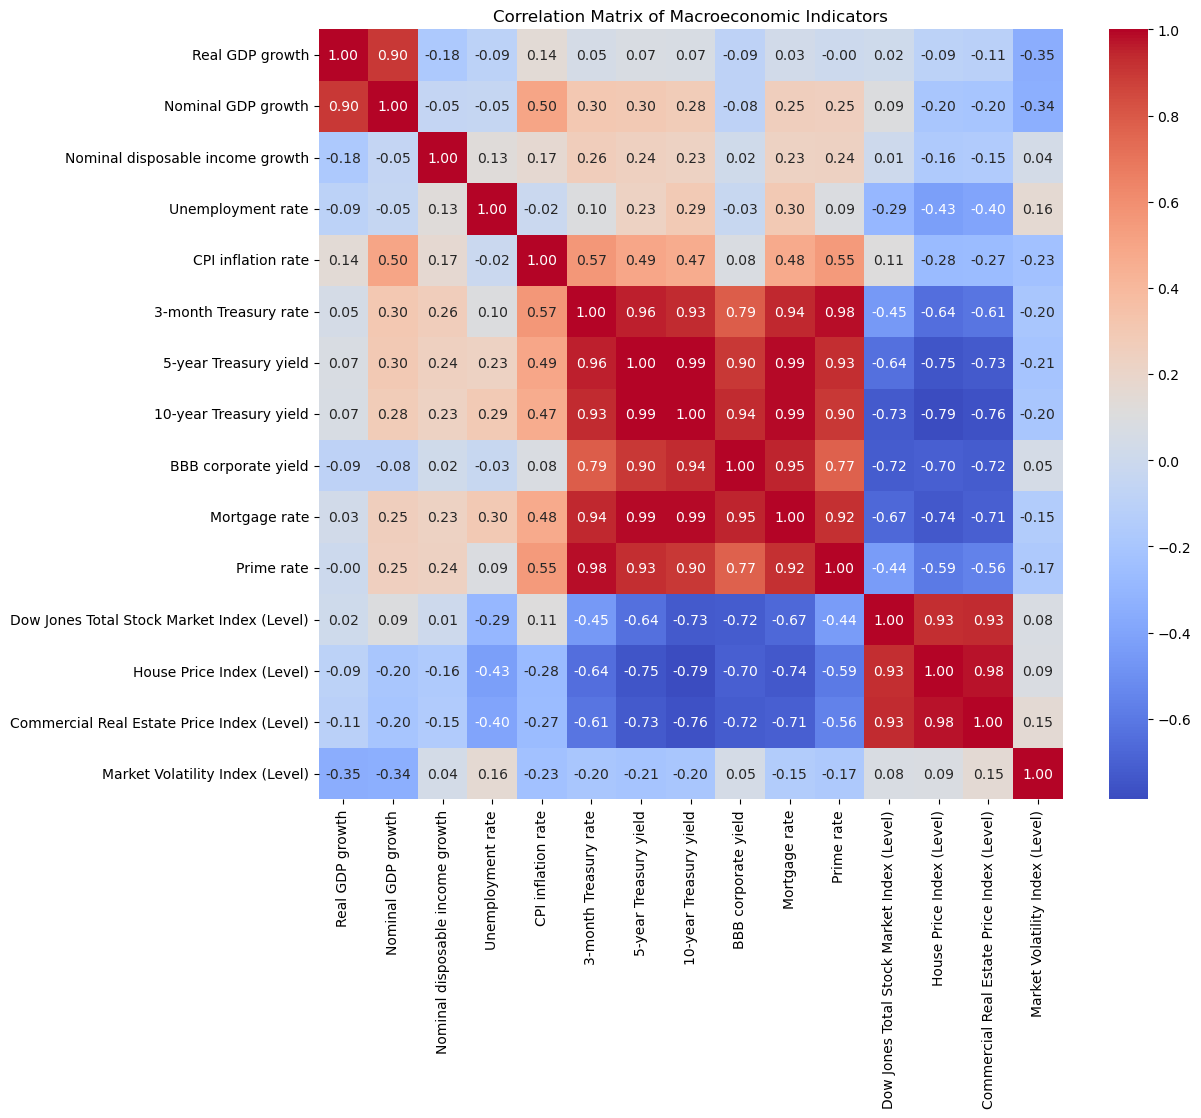

In [29]:
# Convert 'Date' column to datetime format (if needed for time series analysis later)
mev['Date'] = pd.to_datetime(mev['Date'].str.replace(' Q', '-Q'))

# Selecting numeric columns for correlation, excluding 'Real disposable income growth'
numeric_columns = mev.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Real disposable income growth' in numeric_columns:
    numeric_columns.remove('Real disposable income growth')

# Creating the correlation matrix
correlation_matrix = mev[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Macroeconomic Indicators')
plt.show()


From your correlation matrix, here are some notable observations:

High Positive Correlations:

 - Treasury Yields: The 3-month, 5-year, and 10-year Treasury yields show very high correlations (0.96 to 1.00) with each other. This suggests they move almost in lockstep, likely reflecting similar market conditions or responses to economic policy.

 - Mortgage Rate and BBB Corporate Yield: Both have high correlations with the Treasury yields (0.99 with 10-year yield). This indicates that they are good indicators of the broader interest rate environment.

 - House Price Index and Commercial Real Estate Price Index: Correlations of 1.00 suggest that these variables are perfectly correlated, possibly due to underlying factors affecting the property market simultaneously.


High Negative Correlations:

 - Market Volatility Index (Level) with almost all indicators: Strong negative correlations with indices such as the Dow Jones Total Stock Market Index (-0.64), House Price Index (-0.74), and others, suggest that higher market volatility is associated with lower performance in these markets.

 - Dow Jones Total Stock Market Index with 3-month, 5-year, and 10-year Treasury yields (-0.64 to -0.72): This implies that when stock indices perform well, bond yields are typically lower, possibly due to a shift in investment preference from bonds to stocks during bullish market periods.

 - Low Correlation (Potential Independent Variables): Unemployment rate and CPI inflation rate show relatively low correlation with each other and with various other indicators like Real GDP growth and Treasury yields. This independence could make them good candidates for variables that provide unique information in a model, without redundancy.

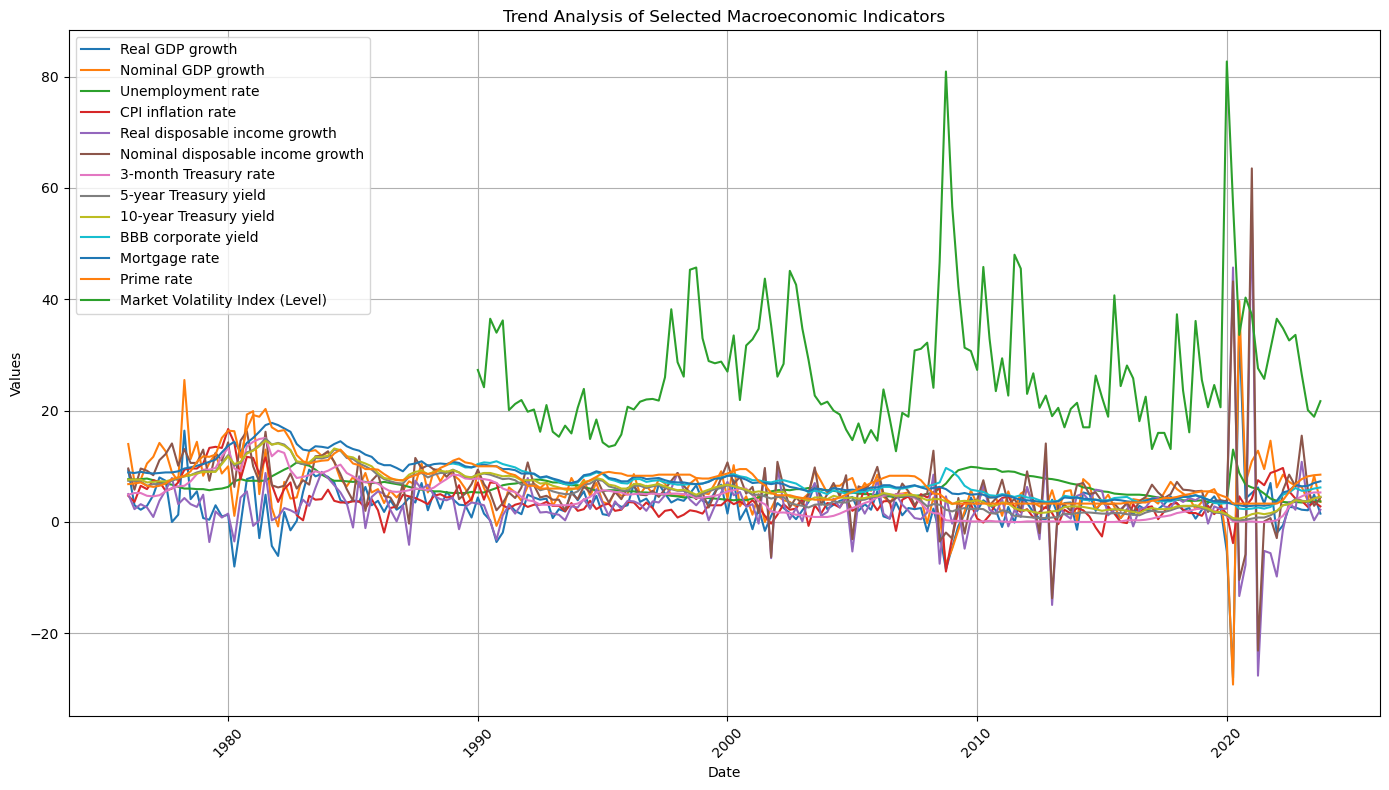

In [30]:
# List of variables to analyze trends for
columns_to_analyze = [
    'Real GDP growth', 
    'Nominal GDP growth', 
    'Unemployment rate', 
    'CPI inflation rate',
    'Real disposable income growth',
    'Nominal disposable income growth',
    '3-month Treasury rate',
    '5-year Treasury yield',
    '10-year Treasury yield',
    'BBB corporate yield',
    'Mortgage rate',
    'Prime rate',
    'Market Volatility Index (Level)'
]

# Plotting each variable as a line graph
plt.figure(figsize=(14, 8))
for column in columns_to_analyze:
    plt.plot(mev['Date'], mev[column], label=column)

# Adding titles and labels
plt.title('Trend Analysis of Selected Macroeconomic Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [31]:
# Corrected list of selected macroeconomic variables including 'Date'
selected_variables = ['Date', 'Real GDP growth', 'Nominal GDP growth', 'Unemployment rate', 
                      'CPI inflation rate', '3-month Treasury rate']

# Create a new DataFrame containing only the selected variables
selected_mev = mev[selected_variables]


# Display the first few rows of the new DataFrame
selected_mev


,Date,Real GDP growth,Nominal GDP growth,Unemployment rate,CPI inflation rate,3-month Treasury rate
0,1976-01-01,9.3,14.0,7.7,4.7,4.9
1,1976-04-01,3.0,7.2,7.6,3.6,5.2
2,1976-07-01,2.2,7.6,7.7,6.5,5.2
3,1976-10-01,2.9,10.5,7.8,5.9,4.7
4,1977-01-01,4.8,11.7,7.5,7.5,4.6
...,...,...,...,...,...,...
187,2022-10-01,2.6,6.5,3.6,4.2,4.0
188,2023-01-01,2.2,6.3,3.5,3.8,4.6
189,2023-04-01,2.1,3.8,3.6,2.7,5.1
190,2023-07-01,4.9,8.3,3.7,3.6,5.3


1. Market Volatility Index (Level)
 - Purpose: This index, often exemplified by metrics like the VIX, measures market risk, uncertainty, and investors' sentiments. It spikes during times of financial distress or market turbulence.
 - Relevance in Stress Testing: It acts as a gauge for the overall risk environment in the financial markets. High values typically correlate with lower market prices and increased investor fear, making it crucial for assessing risk under stress scenarios.
2. Unemployment Rate
 - Purpose: The unemployment rate is a lagging indicator that provides insights into the health of the labor market. Changes in the unemployment rate are closely tied to economic activity and consumer confidence.
 - Relevance in Stress Testing: It helps evaluate the resilience of the economy in face of adverse events. Higher unemployment may lead to lower consumer spending and could be a precursor to recession, affecting the performance of investments and loan defaults.
3. CPI Inflation Rate
 - Purpose: The Consumer Price Index (CPI) measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. It's a direct measure of purchasing power and price stability.
 - Relevance in Stress Testing: Inflation impacts interest rates, currency values, and overall economic policies. Understanding how scenarios affect inflation helps in forecasting cost of living adjustments, wage growth demands, and policy shifts.
4. Real GDP Growth
 - Purpose: GDP growth measures the economic activity and health of the economy, reflecting the total output of goods and services.
 - Relevance in Stress Testing: It’s essential for assessing the potential growth or contraction in the economy under different scenarios. A decline in GDP growth could signal a recession, affecting investment portfolios, corporate earnings, and employment rates.
5. 3-month Treasury Rate
 - Purpose: Short-term Treasury rates are influenced by the Federal Reserve's policies and are indicative of the short-term borrowing costs.
 - Relevance in Stress Testing: The 3-month Treasury rate is a benchmark for many other rates, including bank loan rates and mortgages. Changes in this rate can influence the entire financial system, affecting liquidity, borrowing costs, and economic growth.

#### Integrating These Variables in Stress Testing

By incorporating these variables, a stress test can comprehensively evaluate how different sectors of the economy and financial markets would behave under various hypothetical adverse scenarios. Here’s how they integrate:

 - Risk Assessment: The Volatility Index and Treasury rates can highlight shifts in risk appetite and funding costs.
 - Economic Impact: GDP and unemployment provide a direct view of economic resilience or weakness.
 - Consumer Impact: CPI gives insight into the consumer side, affecting consumption patterns and retail sales.

Each variable covers a different facet of economic and market dynamics, ensuring that the stress tests can uncover potential vulnerabilities and help in making informed decisions to mitigate those risks.

#### 2 - Report the results from the Fama-French three-factor model.

The Fama-French three-factor model is formulated as follows:

$$
r_{i,t} - r_{f,t} = \alpha_i + \beta_{i,M} (Rm_t - Rf_t) + \beta_{i,SMB} SMB_t + \beta_{i,HML} HML_t + \epsilon_{i,t}
$$

In [32]:
# Normalize column names to replace non-ASCII dashes with ASCII hyphens
wrds_data.columns = wrds_data.columns.str.replace('\u2013', '-', regex=True)

# Specify the corrected column names
fama_french_columns = [
    'Date', 
    'FAMA-FRENCH MARKET FACTOR', 
    'FAMA-FRENCH SIZE FACTOR (SMB)', 
    'FAMA-FRENCH VALUE FACTOR (HML)',
    'S&P RETURN'
]

# Create a new DataFrame
fama_french_factors = wrds_data[fama_french_columns]

# Rename columns for simplicity
fama_french_factors = fama_french_factors.rename(columns={
    'FAMA-FRENCH MARKET FACTOR': 'Market Factor (Rm-Rf)',
    'FAMA-FRENCH SIZE FACTOR (SMB)': 'SMB',
    'FAMA-FRENCH VALUE FACTOR (HML)': 'HML',
    'S&P RETURN': 'S&P 500 Return'
})

# Display the first few rows of the new DataFrame
fama_french_factors.head(30)

,Date,Market Factor (Rm-Rf),SMB,HML,S&P 500 Return
0,1963-01,0.0493,0.0308,0.0221,0.0491
1,1963-02,-0.0238,0.0048,0.0218,-0.0289
2,1963-03,0.0308,-0.0259,0.0206,0.0355
3,1963-04,0.0451,-0.0134,0.0100,0.0485
4,1963-05,0.0176,0.0113,0.0254,0.0143
5,1963-06,-0.0200,-0.0027,0.0075,-0.0202
6,1963-07,-0.0039,-0.0045,-0.0097,-0.0035
7,1963-08,0.0507,-0.0098,0.0180,0.0487
8,1963-09,-0.0157,-0.0033,0.0013,-0.0110
9,1963-10,0.0253,-0.0058,-0.0010,0.0322


In [33]:
def fama_french_regression(factors, portfolio_excess_return):
    """
    Perform the Fama-French three-factor regression.

    Parameters:
    - factors (pd.DataFrame): A DataFrame containing the Fama-French factors with columns:
        - 'Market Factor (Rm-Rf)' (Market excess return factor)
        - 'SMB' (Size premium factor)
        - 'HML' (Value premium factor)
    - portfolio_excess_return (pd.Series): A Series of the portfolio's excess returns over the risk-free rate.

    Returns:
    - regression_results: The summary of the regression as a text object.
    """
    # Add a constant term for the regression (for the alpha/intercept)
    X = sm.add_constant(factors)

    # Define the dependent variable (excess returns of the portfolio)
    Y = portfolio_excess_return

    # Fit the Ordinary Least Squares (OLS) regression model
    model = sm.OLS(Y, X).fit()

    # Return the regression summary
    return model.summary()

#### 3 - Use data from all times to run a linear regression to identify the impact of your chosen MEVs on Fama-French factors. Report the results. Be aware that return and factor data are monthly while MEVs are quarterly.

In [34]:

def prepare_and_merge_data(mev_df, ff_df):
    # Convert date columns to datetime
    mev_df['Date'] = pd.to_datetime(mev_df['Date'])
    ff_df['Date'] = pd.to_datetime(ff_df['Date'])
    
    # Set the date as the index
    mev_df.set_index('Date', inplace=True)
    ff_df.set_index('Date', inplace=True)
    
    # Resample the MEV data monthly and forward fill
    mev_df = mev_df.resample('MS').ffill()  # MS is month start frequency

    # Ensure the range covers the entirety of both datasets
    start_date = max(mev_df.index.min(), ff_df.index.min())
    end_date = min(mev_df.index.max(), ff_df.index.max())

    # Trim both dataframes to the same date range
    mev_df = mev_df[start_date:end_date]
    ff_df = ff_df[start_date:end_date]

    # Merge the datasets
    merged_df = ff_df.join(mev_df, how='left')

    return merged_df

# Example usage
# merged_data = prepare_and_merge_data(mev_data, fama_french_data)
# print(merged_data.head())


# Example usage with your data
# Assuming you have loaded your datasets into mev_data and fama_french_data
# merged_data = prepare_and_merge_data(mev_data, fama_french_data)


def run_regression(merged_data, dependent_var, independent_vars):
    # Drop rows with any NaN values in specified columns
    merged_data = merged_data.dropna(subset=dependent_var + independent_vars)

    # Prepare the model data
    X = merged_data[independent_vars]
    y = merged_data[dependent_var]
    
    print("Shape of X:", X.shape)  # Should print (n, k) where n is number of observations, k is number of variables
    print("Shape of y:", y.shape)  # Should print (n,) or (n, 1)

    # Add constant to X
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    return model.summary()




In [35]:
# Call the clean_and_merge_data function
merged_data = prepare_and_merge_data(selected_mev, fama_french_factors)
merged_data


/var/folders/f6/v8xrmxds5l59tw_j8gystq_h0000gn/T/ipykernel_31210/327241251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mev_df['Date'] = pd.to_datetime(mev_df['Date'])


,Market Factor (Rm-Rf),SMB,HML,S&P 500 Return,Real GDP growth,Nominal GDP growth,Unemployment rate,CPI inflation rate,3-month Treasury rate
Date,,,,,,,,,
1976-01-01,0.1216,0.0481,0.0863,0.1183,9.3,14.0,7.7,4.7,4.9
1976-02-01,0.0032,0.0706,0.0587,-0.0114,9.3,14.0,7.7,4.7,4.9
1976-03-01,0.0232,-0.0116,-0.0012,0.0307,9.3,14.0,7.7,4.7,4.9
1976-04-01,-0.0149,-0.0011,-0.0016,-0.0110,3.0,7.2,7.6,3.6,5.2
1976-05-01,-0.0134,-0.0123,-0.0136,-0.0144,3.0,7.2,7.6,3.6,5.2
...,...,...,...,...,...,...,...,...,...
2023-06-01,0.0647,0.0155,-0.0020,0.0647,2.1,3.8,3.6,2.7,5.1
2023-07-01,0.0321,0.0205,0.0411,0.0311,4.9,8.3,3.7,3.6,5.3
2023-08-01,-0.0239,-0.0320,-0.0108,-0.0177,4.9,8.3,3.7,3.6,5.3


In [36]:
independent_vars = [
    'Real GDP growth',
    'Nominal GDP growth',
    'Unemployment rate',
    'CPI inflation rate',
    '3-month Treasury rate'
]

In [37]:
for dependent_var in ['Market Factor (Rm-Rf)']:
    print("Regression results for:", dependent_var)
    print(run_regression(merged_data, [dependent_var], independent_vars))

Regression results for: Market Factor (Rm-Rf)
Shape of X: (574, 5)
Shape of y: (574, 1)
                              OLS Regression Results                             
Dep. Variable:     Market Factor (Rm-Rf)   R-squared:                       0.025
Model:                               OLS   Adj. R-squared:                  0.016
Method:                    Least Squares   F-statistic:                     2.896
Date:                   Mon, 18 Nov 2024   Prob (F-statistic):             0.0136
Time:                           18:08:11   Log-Likelihood:                 972.66
No. Observations:                    574   AIC:                            -1933.
Df Residuals:                        568   BIC:                            -1907.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--

In [38]:
for dependent_var in ['SMB']:
    print("Regression results for:", dependent_var)
    print(run_regression(merged_data, [dependent_var], independent_vars))

Regression results for: SMB
Shape of X: (574, 5)
Shape of y: (574, 1)
                            OLS Regression Results                            
Dep. Variable:                    SMB   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.960
Date:                Mon, 18 Nov 2024   Prob (F-statistic):             0.0120
Time:                        18:08:11   Log-Likelihood:                 1210.6
No. Observations:                 574   AIC:                            -2409.
Df Residuals:                     568   BIC:                            -2383.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [39]:
for dependent_var in ['HML']:
    print("Regression results for:", dependent_var)
    print(run_regression(merged_data, [dependent_var], independent_vars))

Regression results for: HML
Shape of X: (574, 5)
Shape of y: (574, 1)
                            OLS Regression Results                            
Dep. Variable:                    HML   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.329
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.250
Time:                        18:08:11   Log-Likelihood:                 1182.5
No. Observations:                 574   AIC:                            -2353.
Df Residuals:                     568   BIC:                            -2327.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### 4 - Use data only from the “stressed times” to establish the impact of MEVs on Fama-French factors under severely adverse scenarios. “Stressed time” can be defined as the periods when the stock market suffered large losses, periods of economic downturn, or period of financial system instability. Justify your sample selection criteria. The dates of the US recession are provided in the Excel files“Business Cycle Dates NBER”. Report the results.

In [40]:
# Calculate descriptive statistics for the 'S&P 500 Return' column
descriptive_stats = merged_data['S&P 500 Return'].describe()

# Print the result
print(descriptive_stats)


count    574.000000
mean       0.007670
std        0.043555
min       -0.217600
25%       -0.017500
50%        0.010600
75%        0.035675
max        0.131800
Name: S&P 500 Return, dtype: float64
